In [1]:
%pylab notebook
import pandas as pd
import dask.dataframe as dd
import os,sys
import logging
import fastparquet
import gc
import cPickle as pickle 

Populating the interactive namespace from numpy and matplotlib


In [2]:
sys.path.insert(0,"../python/")

### A

In [3]:
from zillow import features,config
reload (features)

<module 'zillow.features' from '../python/zillow/features.pyc'>

In [4]:
def read_error(state,year):
    fname=os.path.join(config.get_state_year_folder2(state,year),'lgbchain_prediction_merged.parq')
    #y=features.get('sale_price_zip5',state,year)
    lati=features.get('longi_lati',state,year)
    month=features.get('month',state,year)
    df=pd.concat([dd.read_parquet(fname)['error'].compute(),lati,month],axis=1).dropna()
    df['year']=(df['month']/100).astype(np.int32)
    df['month']=(df['month']-df['year']*100).astype(np.int32)
    df['abserror']=df['error'].abs()
    return df

In [5]:
def read_state_error(state):
    return pd.concat([read_error(state,year) for year in config.YEARS],0)
        


In [6]:
df = read_state_error('06')

In [7]:
df.shape

(646717, 6)

In [8]:
df[['year','error','abserror']].groupby('year').aggregate(['mean','std','median','count'])

error                             abserror                           
          mean       std    median  count      mean       std    median  count
year                                                                          
2007  0.013551  0.216631  0.000189  60822  0.120033  0.180844  0.070935  60822
2008  0.016360  0.235058 -0.000126  41613  0.140176  0.189395  0.086490  41613
2009  0.016029  0.216550  0.000061  41488  0.130785  0.173337  0.082084  41488
2010  0.014568  0.207183 -0.000150  45799  0.119493  0.169877  0.071368  45799
2011  0.013767  0.205648 -0.000519  45599  0.123889  0.164717  0.077786  45599
2012  0.015175  0.207244 -0.000523  57830  0.127142  0.164363  0.082447  57830
2013  0.019613  0.202928 -0.000396  67639  0.119293  0.165328  0.073788  67639
2014  0.013781  0.199313  0.000130  67385  0.110949  0.166149  0.065880  67385
2015  0.014114  0.194782  0.000013  69599  0.107935  0.162755  0.064516  69599
2016  0.011729  0.201719 -0.000201  65608  0.100048  0.175552  0.055512  65608
2017  0.012823  0.195912  0.000127  65591  0.104481  0.166222  0.061390  65591
2018  0.021419  0.264915 -0.000771  17744  0.131679  0.230865  0.068586  17744

In [9]:
grouped=df[df.year==2018][['month','error','abserror']].groupby('month').aggregate(['mean','std','median','count'])
grouped

error                            abserror                          
           mean       std    median count      mean       std    median count
month                                                                        
1      0.045545  0.282713  0.018267  3037  0.140818  0.249330  0.068968  3037
2      0.032944  0.261633  0.008304  3316  0.134275  0.226941  0.069750  3316
3      0.018802  0.252717 -0.000914  4560  0.124749  0.220576  0.068362  4560
4     -0.002523  0.246251 -0.021989  3570  0.127981  0.210386  0.070273  3570
5      0.014791  0.292369 -0.004204  2937  0.137683  0.258333  0.067119  2937
6      0.038028  0.197237  0.005072   324  0.103289  0.172196  0.056811   324

In [10]:
grouped=df[df.year<2018][['month','error','abserror']].groupby('month').aggregate(['mean','std','median','count'])
grouped

error                             abserror                      \
           mean       std    median  count      mean       std    median   
month                                                                      
1      0.037522  0.224467  0.013368  33332  0.123671  0.191045  0.071693   
2      0.032218  0.216322  0.009516  34981  0.120820  0.182305  0.069690   
3      0.026490  0.209996  0.007830  50703  0.116616  0.176637  0.067106   
4      0.013917  0.210167 -0.001300  55199  0.114407  0.176846  0.067057   
5      0.009978  0.195857 -0.001167  61933  0.111780  0.161134  0.067784   
6      0.008754  0.194627 -0.002738  65653  0.111402  0.159830  0.067333   
7      0.011538  0.198330 -0.001805  62433  0.112699  0.163605  0.067799   
8      0.008118  0.198732 -0.004579  60384  0.113594  0.163268  0.069016   
9      0.011765  0.200047 -0.002179  52881  0.115162  0.163996  0.070469   
10     0.008480  0.204005 -0.004159  54672  0.118716  0.166120  0.073291   
11     0.011018  0.208508 -0.000691  48584  0.122169  0.169327  0.075329   
12     0.014045  0.228935 -0.003430  48218  0.130325  0.188742  0.078122   

              
       count  
month         
1      33332  
2      34981  
3      50703  
4      55199  
5      61933  
6      65653  
7      62433  
8      60384  
9      52881  
10     54672  
11     48584  
12     48218

<IPython.core.display.Javascript object>


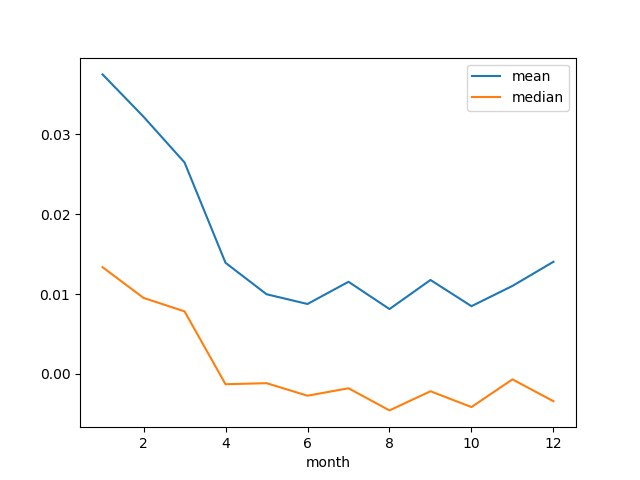

In [11]:
grouped['error'][['mean','median']].plot();

<IPython.core.display.Javascript object>


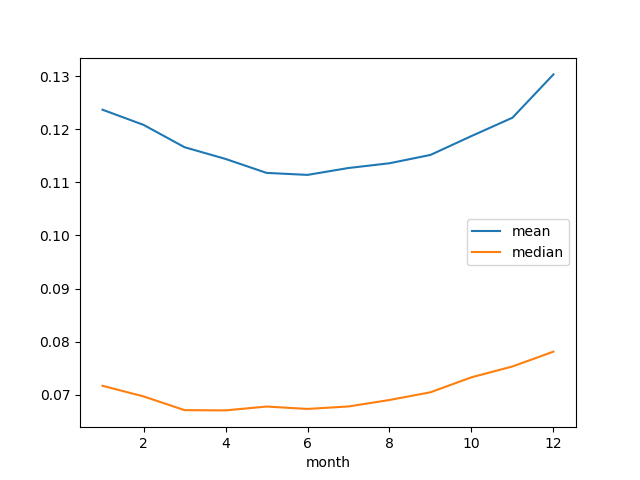

In [12]:
grouped['abserror'][['mean','median']].plot();

In [13]:
df.head()

error   longitude   latitude  month  year  abserror
parcelid                                                        
8921083   0.049147 -122.267975  37.794064      5  2007  0.049147
8921132  -0.362422 -122.283165  37.798264     12  2007  0.362422
8921284  -0.039346 -122.273750  37.796490      5  2007  0.039346
8921288  -0.029541 -122.273750  37.796490      5  2007  0.029541
8921303   0.049850 -122.272583  37.795872      2  2007  0.049850

In [20]:
def plot3d(subdf,col):
    import os
    import numpy as np
    from mpl_toolkits.mplot3d import Axes3D
    import matplotlib.pyplot as plt
    from scipy.interpolate import griddata


    fig = plt.figure()
    ax = Axes3D(fig)
    # my_data = np.genfromtxt('2014_0.01_v3_HDF5.txt', delimiter = ',',     skip_header = 1)
    # my_data[my_data==0] = np.nan 
    # my_data = my_data[~np.isnan(my_data).any(axis=1)]
    X = subdf.longitude.values
    Y = subdf.latitude.values
    Z = subdf[col].values
    xi = np.linspace(X.min(),X.max(),(len(Z)/3))
    yi = np.linspace(Y.min(),Y.max(),(len(Z)/3))
    zi = griddata((X, Y), Z, (xi[None,:], yi[:,None]), method='nearest')

    xig, yig = np.meshgrid(xi, yi)

    surf = ax.plot_surface(xig, yig, zi, cmap='gist_earth')
    fig.colorbar(surf, shrink=0.5, aspect=5)
    ax.set_xlabel('Latitude')
    ax.set_ylabel('Longitude')
    ax.set_zlabel('error ')
    #ax.set_zlim3d(Z.min(),Z.max())

In [21]:
subdf=df.iloc[np.random.permutation(range(len(df)))[:2000]]

In [24]:
subdf=df[df.year==2018]
subdf=df.iloc[np.random.permutation(range(len(subdf)))[:2000]]

<IPython.core.display.Javascript object>


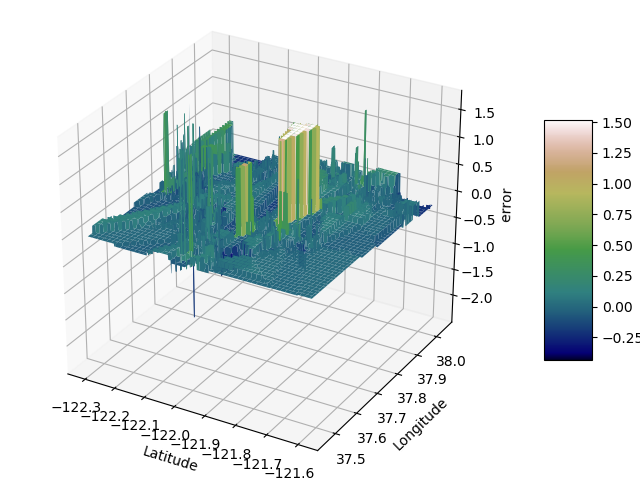

In [26]:
plot3d(subdf,'error')

<IPython.core.display.Javascript object>


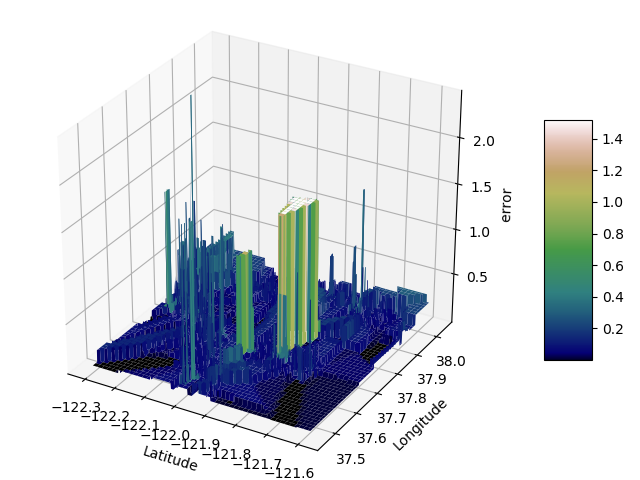

In [25]:
plot3d(subdf,'abserror')

In [27]:
subdf=df[df.year==2017]
subdf=df.iloc[np.random.permutation(range(len(subdf)))[:2000]]

In [28]:
plot3d(subdf,'error')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


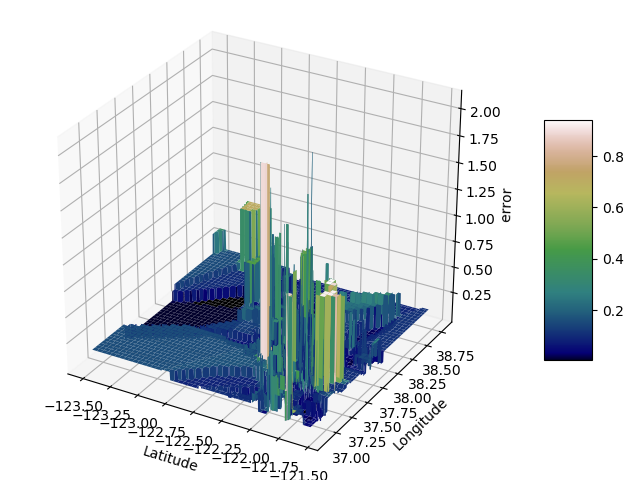

In [29]:
plot3d(subdf,'abserror')